In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
hcv = pd.read_csv('hcvdat0.csv')

In [3]:
hcv.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:

# Assuming 'hcv' is your DataFrame and 'column_to_drop' is the column you want to drop
column_to_drop = 'Unnamed: 0'  # Replace with your actual column name

# Drop the specified column
hcv.drop(column_to_drop, axis=1, inplace=True)


In [5]:
#What are the data types? (Only numeric and categorical)
#All attributes except Category and Sex are numerical.
#ALB: Albumin level
#ALP: Alkaline phosphatase level
#ALT: Alanine transaminase level
#AST: Aspartate transaminase level
#BIL: Bilirubin level
#CHE: Acetylcholinesterase level
#CHOL: Cholesterol level
#CREA: Creatinine level
#GGT: Gamma-glutamyl transferase level
#PROT: Total protein level
hcv.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [6]:
#Are there missing values?
hcv.isnull().sum()

Category     0
Age          0
Sex          0
ALB          0
ALP         17
ALT          1
AST          0
BIL          0
CHE          0
CHOL         6
CREA         0
GGT          0
PROT         1
dtype: int64

In [4]:
#assigning numeric values to categorical data
hcv['Category'] = hcv['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

hcv['Sex'] = hcv['Sex'].map({'m': 1, 'f': 0})

In [31]:
#Preprocessing by filling the null values with median
hcv.fillna(hcv.median() ,inplace=True)

In [9]:
hcv.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

<Figure size 800x500 with 0 Axes>

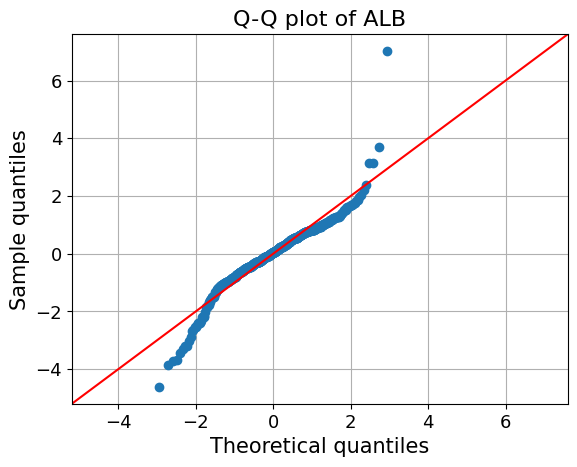

<Figure size 800x500 with 0 Axes>

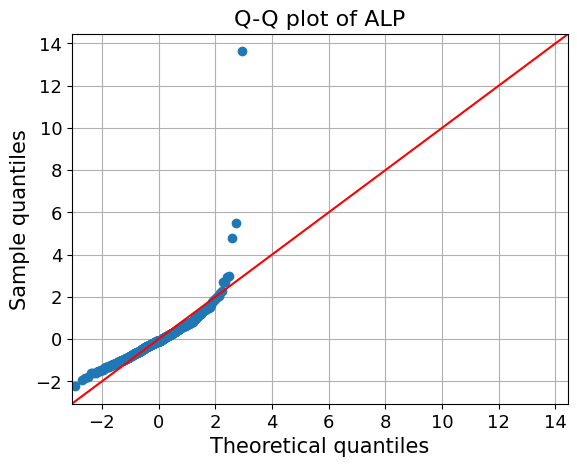

<Figure size 800x500 with 0 Axes>

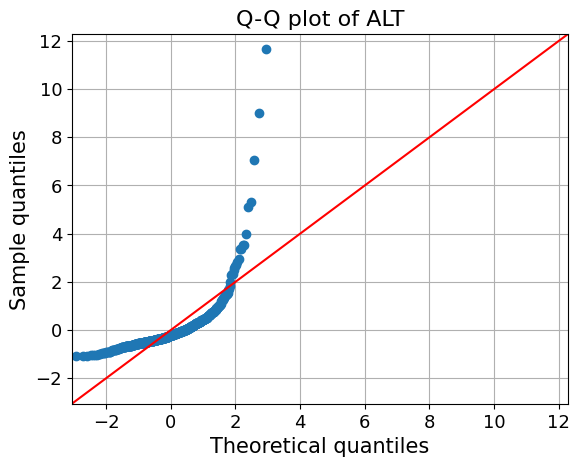

<Figure size 800x500 with 0 Axes>

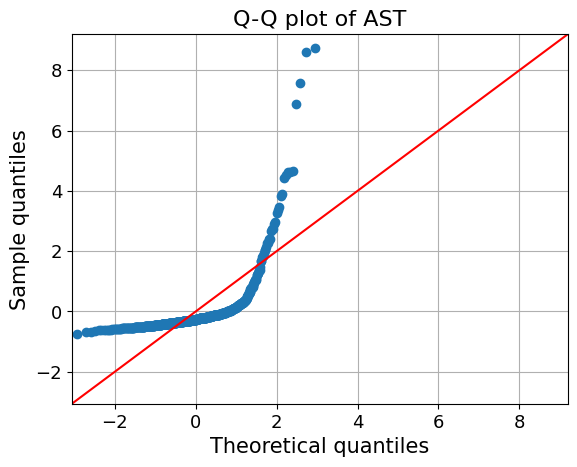

<Figure size 800x500 with 0 Axes>

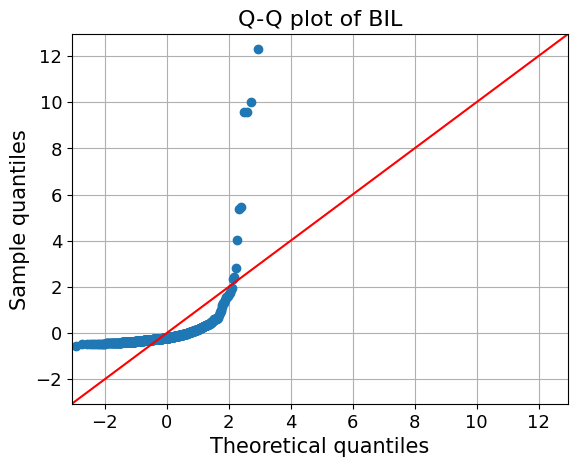

<Figure size 800x500 with 0 Axes>

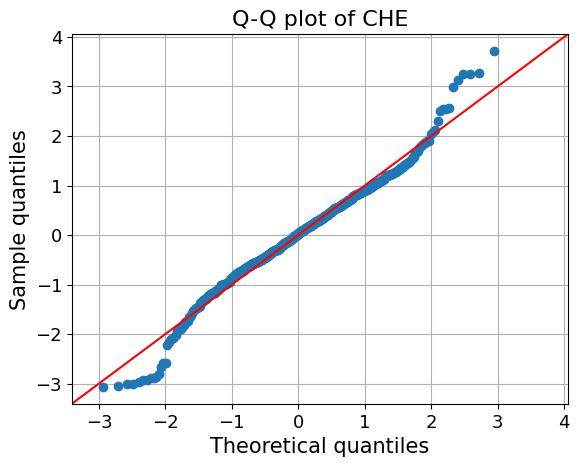

<Figure size 800x500 with 0 Axes>

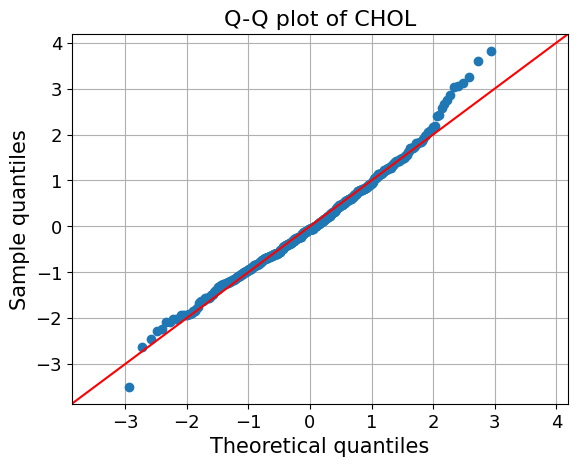

<Figure size 800x500 with 0 Axes>

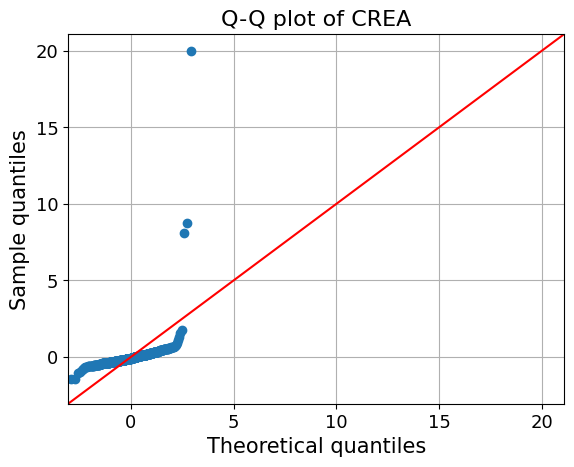

<Figure size 800x500 with 0 Axes>

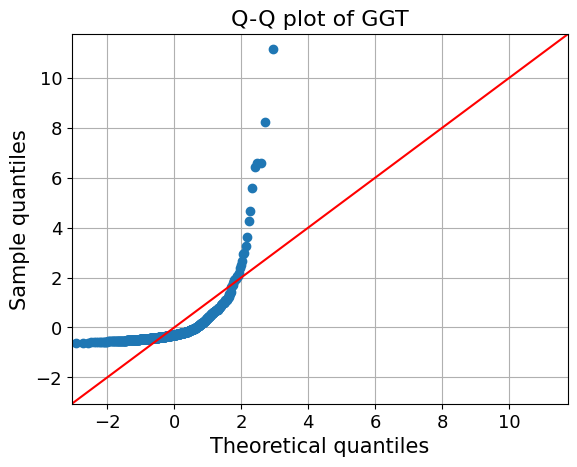

<Figure size 800x500 with 0 Axes>

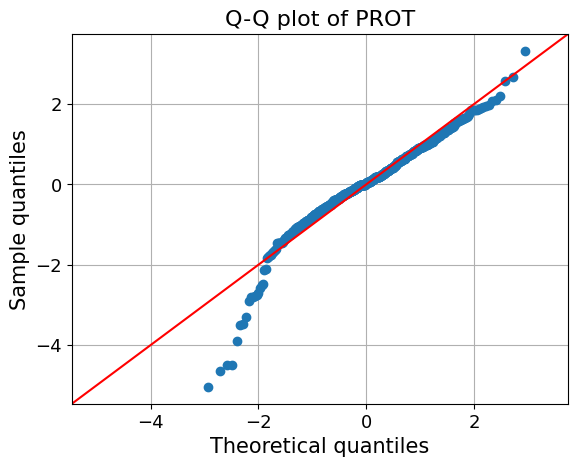

In [10]:
#What are the likely distributions of the numeric variables?
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = hcv[
    ["ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL","CREA", "GGT", "PROT", ]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

In [ ]:
#observations above
#normal distribution: ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT and PROT all independent variables roughly follow normal distribution
#There are few outliers in ALB, ALP, CREA, 

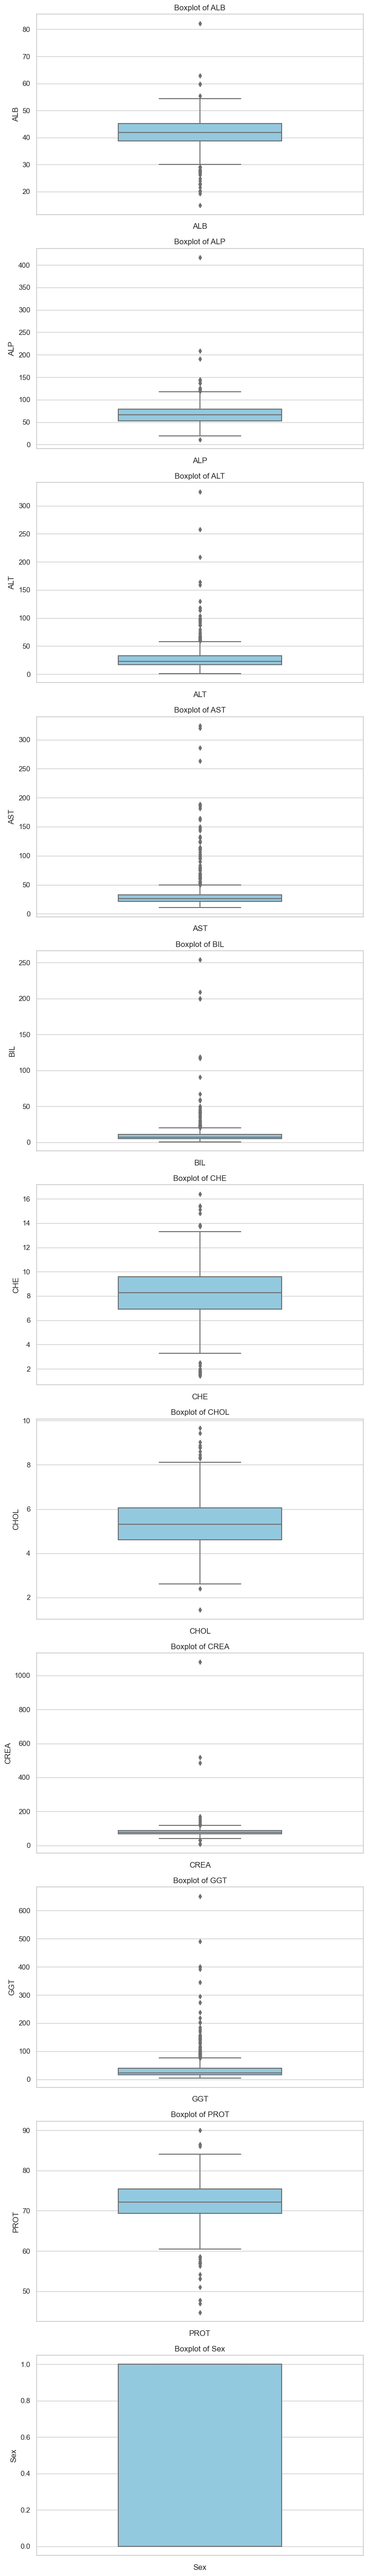

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'hcv' is your DataFrame
data_norm = hcv[["ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT", "Sex"]]

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a single layout for all rotated boxplots
fig, axes = plt.subplots(nrows=len(data_norm.columns), ncols=1, figsize=(8, 5 * len(data_norm.columns)))

for i, c in enumerate(data_norm.columns):
    # Rotated Boxplot
    sns.boxplot(y=data_norm[c], ax=axes[i], color="skyblue", width=0.5)
    axes[i].set_title("Boxplot of {}".format(c))
    axes[i].set_xlabel(c)
    
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#observation of above normalizing CHE, CHOL and PROT because these values are too high when compared to other independent variables

In [6]:


# Function to normalize an entire column using z-score normalization
def normalize_column(column):
    normalized_column = (column - column.mean()) / column.std()
    return normalized_column

# Function to min-max normalize an entire column
def min_max_normalize_column(column):
    normalized_column = (column - column.min()) / (column.max() - column.min())
    return normalized_column

# Function to apply normalization to a chosen column in a DataFrame
def apply_normalization(df, column_name, normalization_type='z_score'):
    if normalization_type == 'z_score':
        df[column_name] = normalize_column(df[column_name])
    elif normalization_type == 'min_max':
        df[column_name] = min_max_normalize_column(df[column_name])
    else:
        print("Invalid normalization type. Please choose 'z_score' or 'min_max'.")

# Example usage for 'CHE' column
column_name_che = 'CHE'
apply_normalization(hcv, column_name_che, normalization_type='z_score')

# Example usage for 'CHOL' column
column_name_chol = 'CHOL'
apply_normalization(hcv, column_name_chol, normalization_type='z_score')

# Example usage for 'PROT' column
column_name_prot = 'PROT'
apply_normalization(hcv, column_name_prot, normalization_type='z_score')

# Print the DataFrame with the normalized columns
print(hcv)


     Category  Age  Sex   ALB     ALP    ALT    AST   BIL       CHE      CHOL  \
0           0   32    1  38.5   52.50    7.7   22.1   7.5 -0.572772 -1.896291   
1           0   32    1  38.5   70.30   18.0   24.7   3.9  1.345111 -0.503414   
2           0   32    1  46.9   74.70   36.2   52.6   6.1  0.291180 -0.148541   
3           0   32    1  43.2   52.00   30.6   22.6  18.9 -0.391840 -0.556645   
4           0   32    1  39.2   74.10   32.6   24.8   9.6  0.431402 -0.929262   
..        ...  ...  ...   ...     ...    ...    ...   ...       ...       ...   
606         1   62    0  32.0  416.60    5.9  110.3  50.0 -1.187943  0.827359   
607         1   64    0  24.0  102.80    2.9   44.4  20.0 -3.010837 -2.082599   
608         1   64    0  29.0   87.30    3.5   99.0  48.0 -2.956557 -1.541418   
609         1   46    0  33.0   66.25   39.0   62.0  20.0 -2.097128 -1.035724   
610         1   59    0  36.0   66.25  100.0   80.0  12.0  0.395216 -0.059823   

      CREA    GGT      PROT

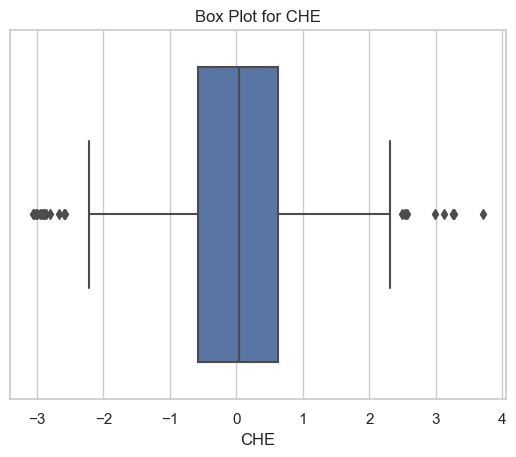

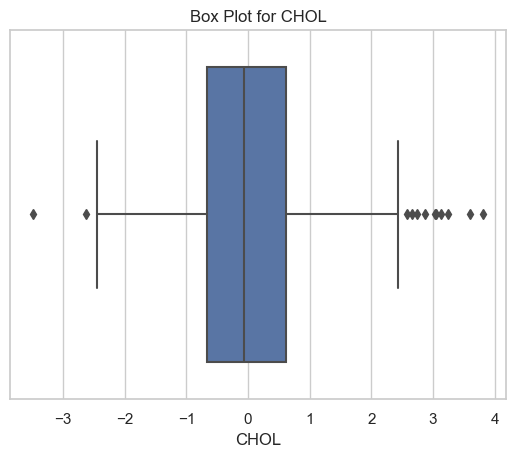

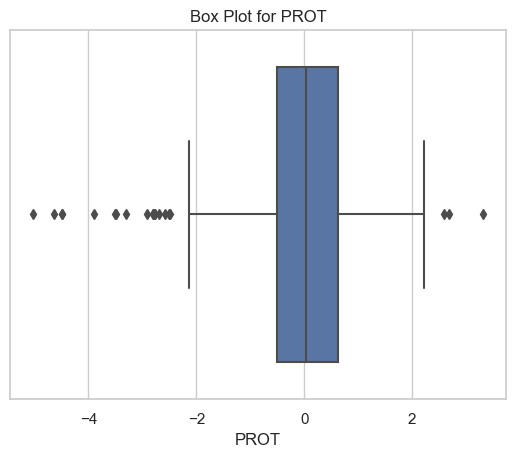

In [15]:
# Function to plot box plot for a given column in a DataFrame
def plot_box_plot(df, column_name):
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot for {column_name}')
    plt.show()

# Example usage for 'CHE' column
plot_box_plot(hcv, column_name_che)

# Example usage for 'CHOL' column
plot_box_plot(hcv, column_name_chol)

# Example usage for 'PROT' column
plot_box_plot(hcv, column_name_prot)


In [ ]:
#from above correlated variables are 1)prot and alb, 2)category encoded and AST 3)ALP and GGT 4)AST and GGT 5) GGT and category

In [ ]:
#from above highest correlation is between Category and AST

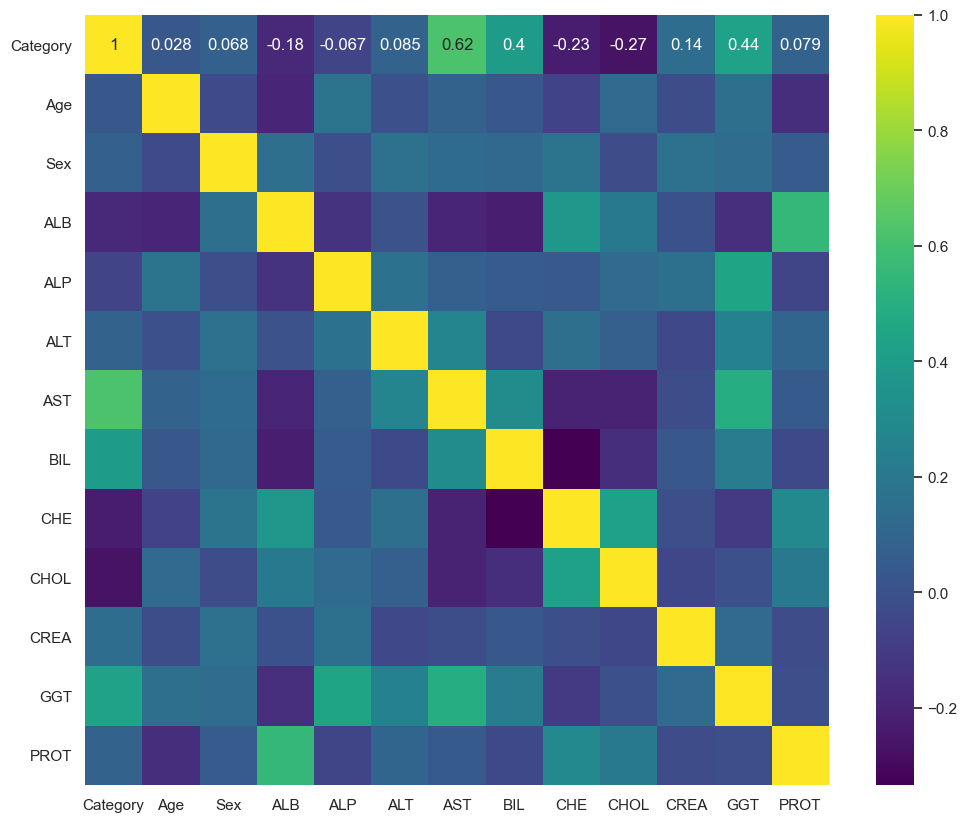

In [17]:
#Finding correlation in the data
corr = hcv.corr()
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr , annot=True , cmap='viridis')
plt.show()

In [18]:
#Printing to total affected and healthy people
print(f'Total of Healthy People : {hcv.Category.value_counts()[0]}')
print(f'Total of Infected People : {hcv.Category.value_counts()[1]}')

Total of Healthy People : 537
Total of Infected People : 74


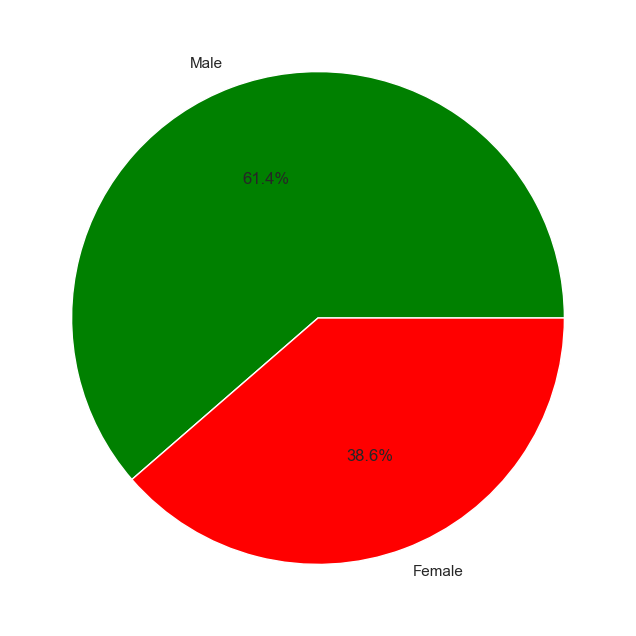

In [19]:
#distribution based on sex
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=hcv["Sex"].value_counts(), 
        colors=["green","red"], 
        labels=["Male","Female"], 
        autopct= '%1.1f%%',
        )
plt.show()

In [ ]:
#We observe that more males were sampled 

In [22]:
#method 1 for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your predictors are in a DataFrame called 'df' and the predictor columns are in a list 'predictors'
predictors = ['Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Create a DataFrame with the predictor variables
X = hcv[predictors]

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


   Variable        VIF
0       Sex   3.060705
1       ALB  11.216019
2       ALP   9.852597
3       ALT   2.687231
4       AST   3.297723
5       BIL   1.676968
6       CHE   1.544164
7      CHOL   1.305430
8      CREA   3.906768
9       GGT   2.637727
10     PROT   1.201510


In [ ]:
#since VIF of each variable is not significantly above 10, there is no mulicollieanrity issue with the variables
#Here's the order of significance from most significant (lower VIF) to least significant (higher VIF) based on the provided VIF values:
#PROT: 1.201510,
#CHOL: 1.305430
#CHE: 1.544164
#BIL: 1.676968
#AST: 3.297723
#ALT: 2.687231
#GGT: 2.637727
#Sex: 3.060705
#CREA: 3.906768
#ALP: 9.852597
#ALB: 11.216019

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Load or create your dataset (replace 'your_dataset.csv' with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Assume 'target_variable' is your dependent variable
target_variable = 'Category'

# Separate independent variables (features) and the target variable
X = hcv.drop(target_variable, axis=1)
y = hcv[target_variable]

# Method 1: Correlation
correlation_matrix = hcv.corr()
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)
selected_features_corr = correlation_with_target[correlation_with_target > 0.1].index.tolist()

# Method 2: Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)
selected_features_mi = X.columns[selector_mi.scores_ > 0.1].tolist()

# Method 3: Feature Importance using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features_rf = feature_importances[feature_importances > 0.01].index.tolist()

# Print selected features from each method
print("Selected Features (Correlation):", selected_features_corr)
print("Selected Features (Mutual Information):", selected_features_mi)
print("Selected Features (Random Forest Feature Importance):", selected_features_rf)


Selected Features (Correlation): ['Category', 'AST', 'GGT', 'BIL', 'CHOL', 'CHE', 'ALB', 'CREA']
Selected Features (Mutual Information): ['ALB', 'ALP', 'ALT', 'AST', 'BIL']
Selected Features (Random Forest Feature Importance): ['AST', 'ALT', 'BIL', 'ALP', 'GGT', 'PROT', 'Age', 'CHE', 'CHOL', 'CREA', 'ALB']


In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create a synthetic classification dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Use RFE with an SVM classifier
svm_classifier = SVC(kernel="linear")
rfe = RFE(estimator=svm_classifier, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)
#print("Selected Features (RFE):", rfe)

Selected Features (RFE): RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)


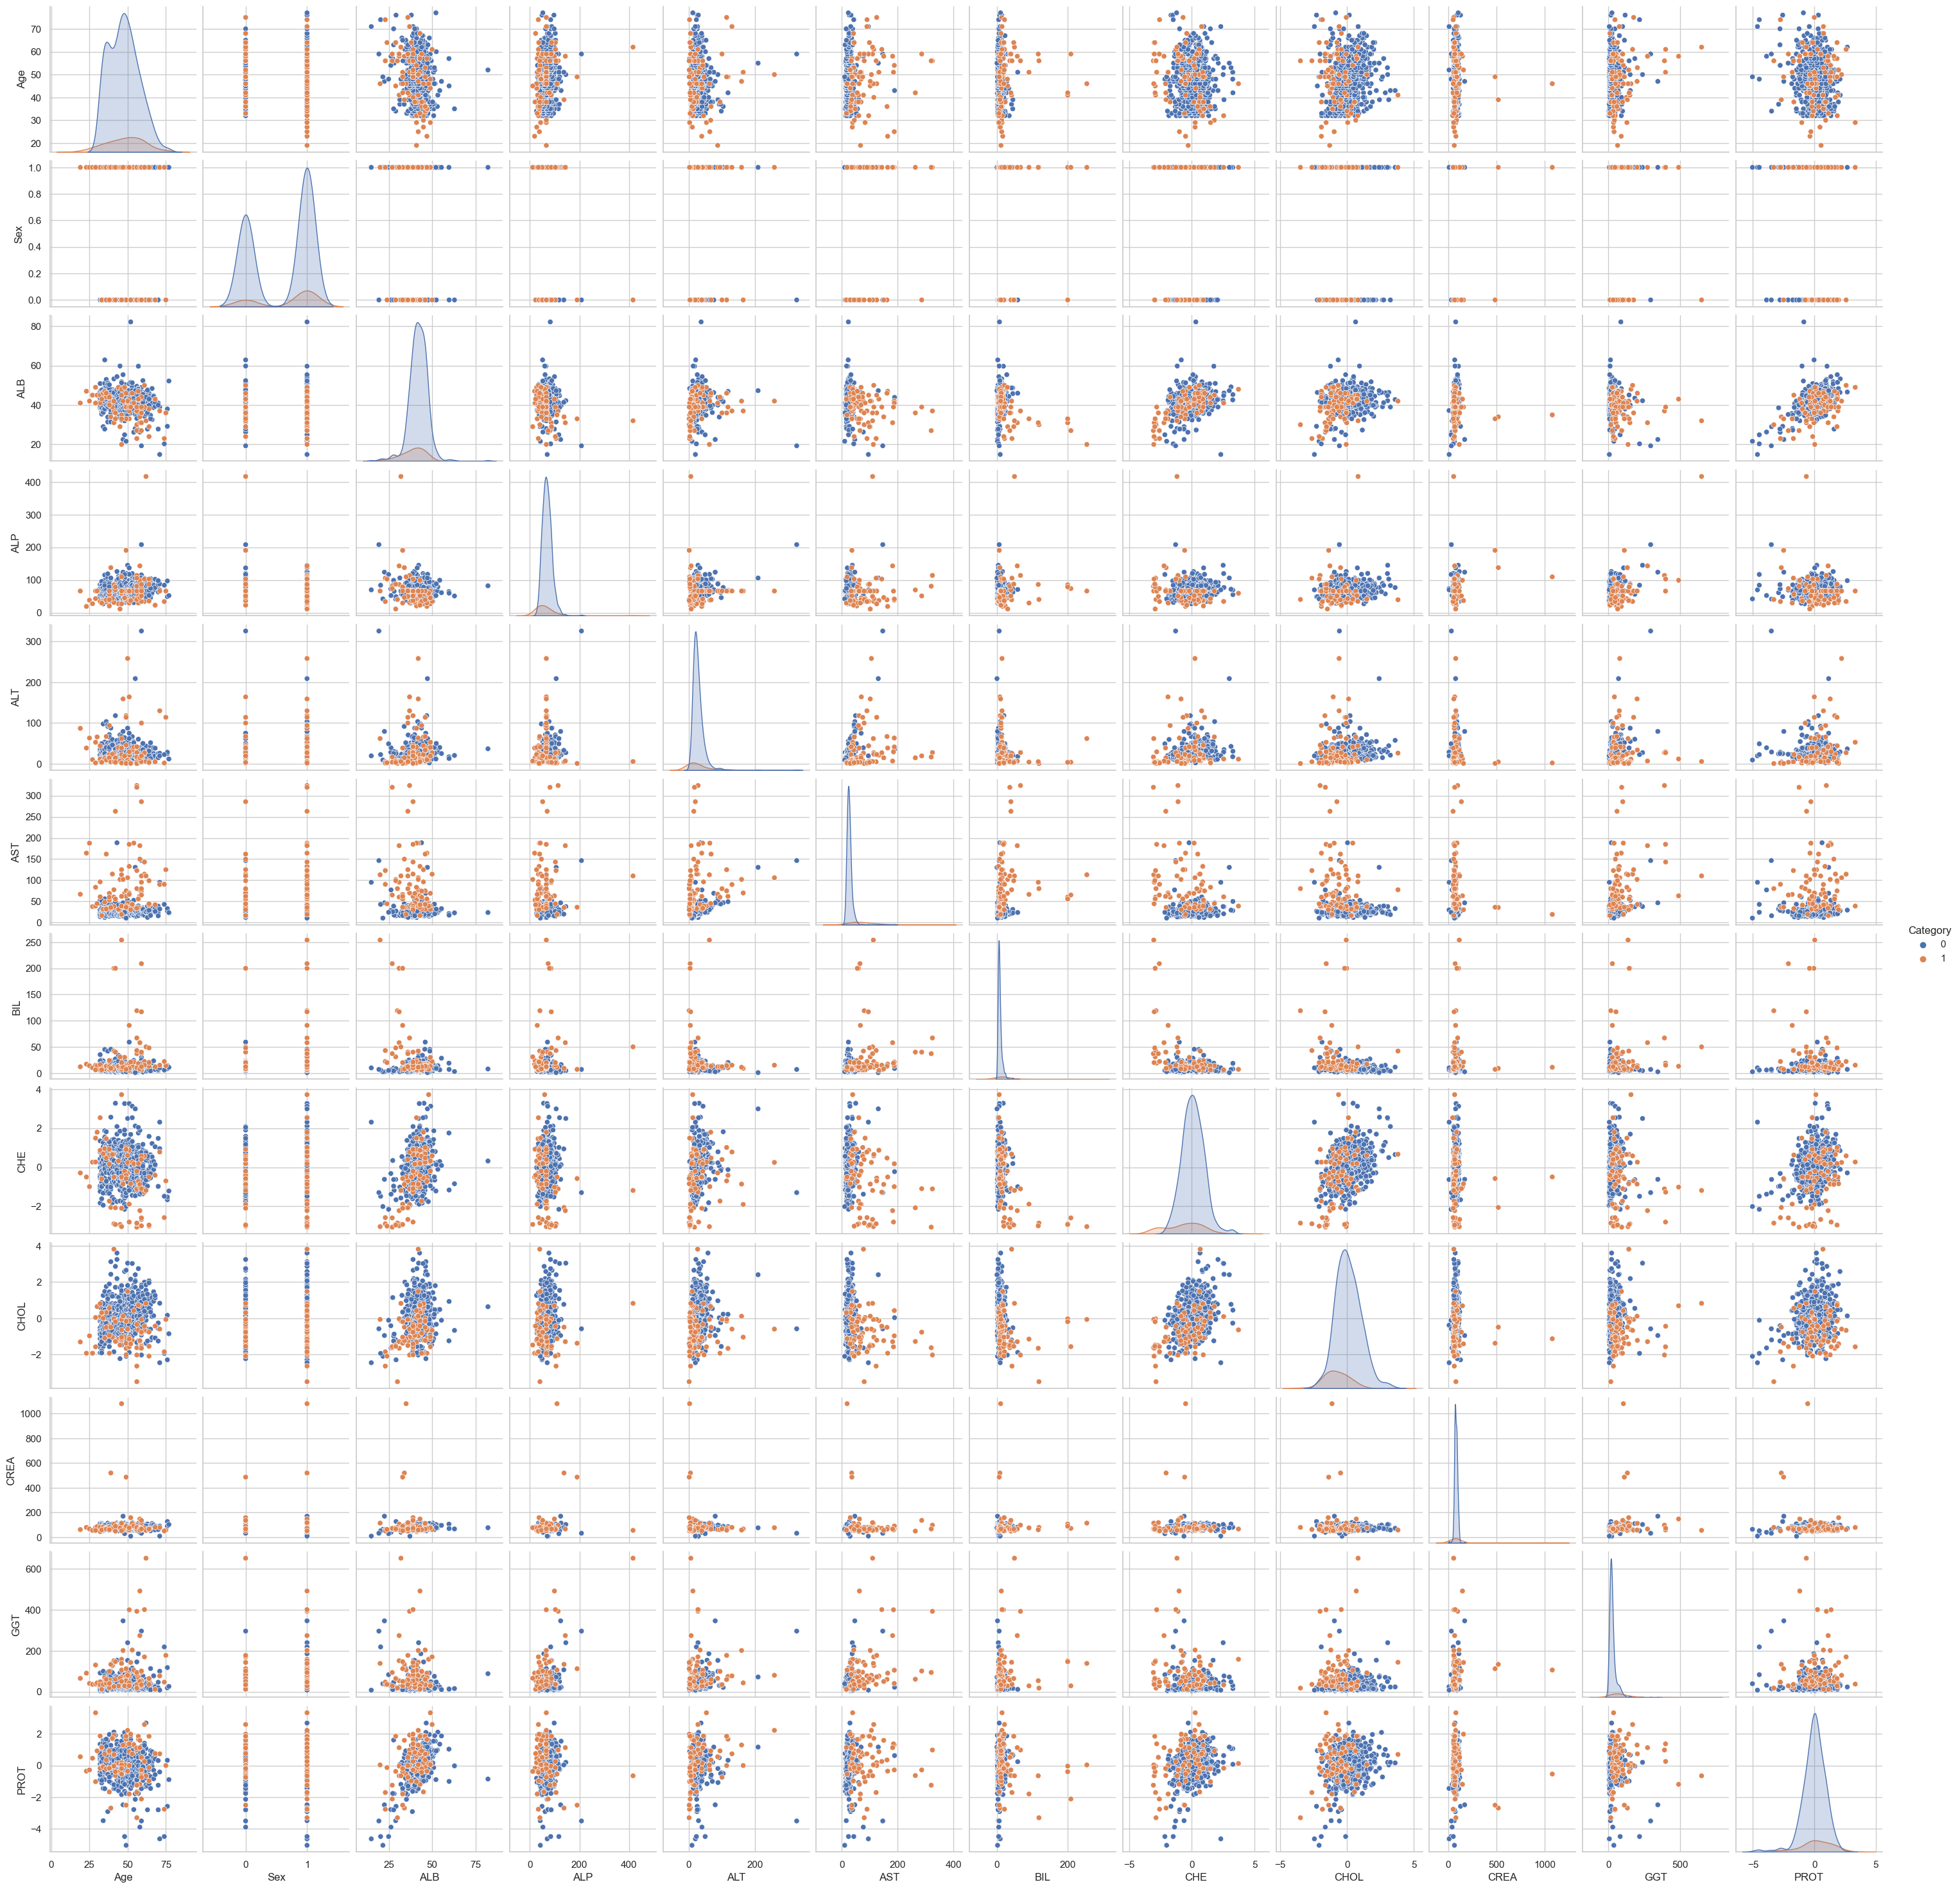

In [23]:
#Ploting the pairplot to visualize the above 
sns.pairplot(hcv, diag_kind="kde",hue="Category")

In [24]:
#Prepping data to build model
x = hcv.drop('Category' , axis = 1)
x.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,-0.572772,-1.896291,106.0,12.1,-0.560790
1,32,1,38.5,70.3,18.0,24.7,3.9,1.345111,-0.503414,74.0,15.6,0.826278
2,32,1,46.9,74.7,36.2,52.6,6.1,0.291180,-0.148541,86.0,33.2,1.344116
3,32,1,43.2,52.0,30.6,22.6,18.9,-0.391840,-0.556645,80.0,33.8,0.678324
4,32,1,39.2,74.1,32.6,24.8,9.6,0.431402,-0.929262,76.0,29.9,-0.616273


In [25]:
y = hcv['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

In [ ]:
#Building logistic regression

In [29]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_train_pred_lr = logistic_regression_model.predict(x_train)
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_lr * 100))

Accuracy on Training Set: 97.13


In [31]:
LR_Score = logistic_regression_model.score(x_test, y_test)
print("Accuracy By Logistic Regression Model:",LR_Score*100)

Accuracy By Logistic Regression Model: 95.1219512195122


Text(0.5, 1.0, 'Confusion Matrix For Logistic Regression')

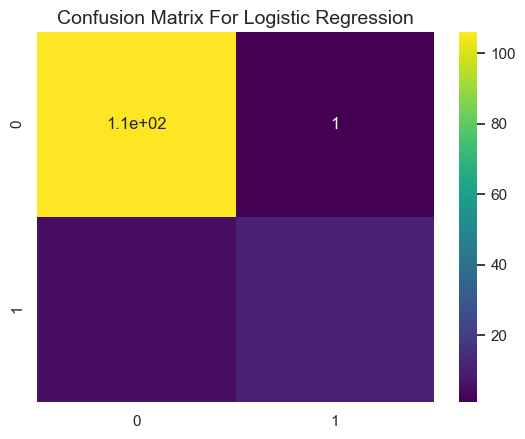

In [32]:
lr_y_pred = logistic_regression_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Logistic Regression", fontsize=14)

In [ ]:
#Hyperparameter tuning to improve the accuracy

In [37]:
lr = LogisticRegression()
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best Parameters:  {'C': 100, 'penalty': 'l2'}


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [38]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 96.52


In [35]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 95.1219512195122


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

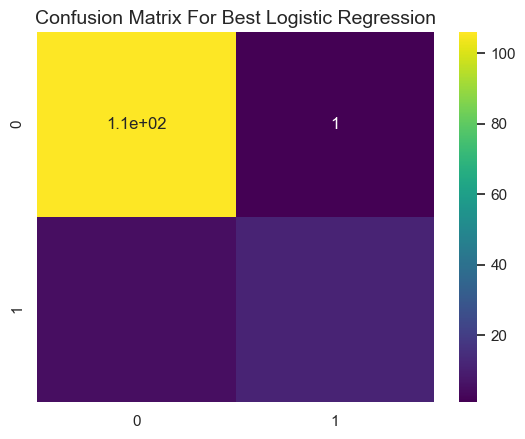

In [36]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

In [ ]:
#Implementing Random Forest Classifier

In [39]:
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_train_pred_rf = randomforest_model.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_rf * 100))

Accuracy on Training Set: 100.00


In [41]:
RF_Score = randomforest_model.score(x_test, y_test)
print("Accuracy By RandomForest Model:",RF_Score*100)

Accuracy By RandomForest Model: 95.9349593495935


Text(0.5, 1.0, 'Confusion Matrix For RandomForest')

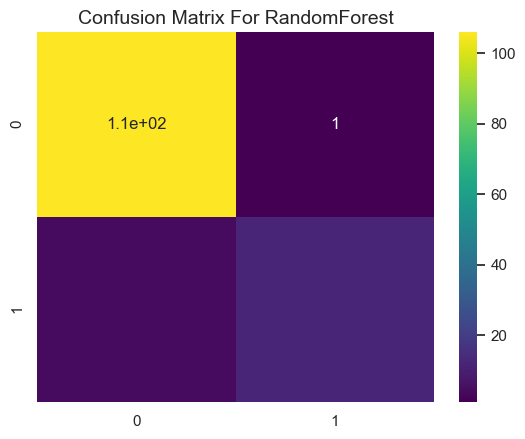

In [42]:
rf_y_pred = randomforest_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For RandomForest", fontsize=14)

In [ ]:
#Hyperparamter tuning to improve the accuracy

In [43]:
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200,300,1000],
    'max_depth': [40,80,90],
    'max_features' :[2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 3,4,5],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]
   
}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=2)
rf_grid_model.fit(x_train,y_train)
Best_RandomForest_Model = rf_grid_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [44]:
print("Best Parameters: ", rf_grid_model.best_params_)

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [45]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 96.72


In [46]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 99.1869918699187


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

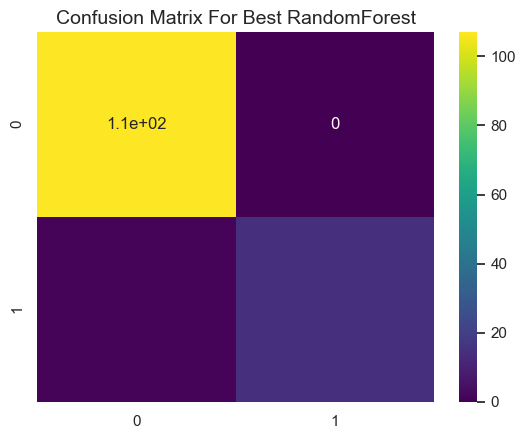

In [47]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

In [ ]:
#Comparing the classifiers

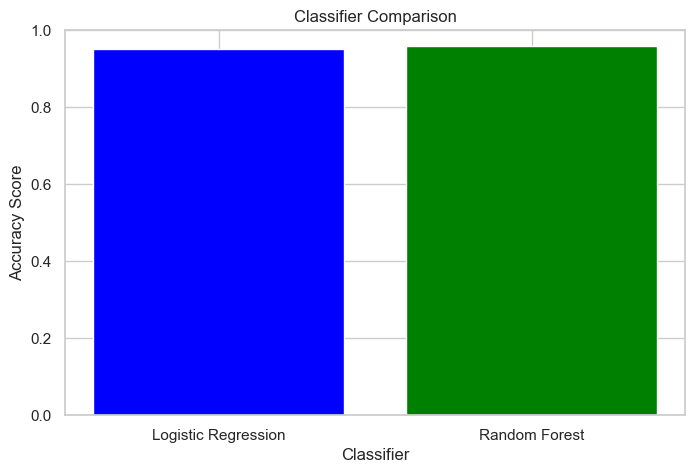

In [50]:
import matplotlib.pyplot as plt

x = ["Logistic Regression", "Random Forest"]
y = [LR_Score, RF_Score]

plt.figure(figsize=(8, 5))
plt.bar(x, y, color=['blue', 'green'])
plt.title('Classifier Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()


In [ ]:
#we observe that Random forest is slightly better classifier

In [53]:
#building the classification model by removing the outliers(ALB, ALP, CREA,)

from scipy import stats

# Choose the columns with potential outliers
columns_to_remove_outliers = ['ALB', 'ALP', 'CREA']

# Function to remove outliers based on Z-score for multiple columns
def remove_outliers_z_score(data, columns, threshold=3):
    filtered_data = data.copy()
    for column in columns:
        z_scores = stats.zscore(data[column])
        abs_z_scores = abs(z_scores)
        filtered_data = filtered_data[(abs_z_scores < threshold)]
    return filtered_data

# Set the Z-score threshold (adjust as needed)
z_score_threshold = 3

# Remove outliers from the specified columns using Z-score
hcv = remove_outliers_z_score(hcv, columns_to_remove_outliers, threshold=z_score_threshold)

# Print the DataFrame without outliers
print(hcv)

     Category  Age  Sex   ALB    ALP    ALT    AST   BIL       CHE      CHOL  \
0           0   32    1  38.5  52.50    7.7   22.1   7.5 -0.572772 -1.896291   
1           0   32    1  38.5  70.30   18.0   24.7   3.9  1.345111 -0.503414   
2           0   32    1  46.9  74.70   36.2   52.6   6.1  0.291180 -0.148541   
3           0   32    1  43.2  52.00   30.6   22.6  18.9 -0.391840 -0.556645   
4           0   32    1  39.2  74.10   32.6   24.8   9.6  0.431402 -0.929262   
..        ...  ...  ...   ...    ...    ...    ...   ...       ...       ...   
604         1   58    0  34.0  46.40   15.0  150.0   8.0 -0.875834 -1.230904   
605         1   59    0  39.0  51.30   19.6  285.8  40.0 -1.097476 -0.760697   
608         1   64    0  29.0  87.30    3.5   99.0  48.0 -2.956557 -1.541418   
609         1   46    0  33.0  66.25   39.0   62.0  20.0 -2.097128 -1.035724   
610         1   59    0  36.0  66.25  100.0   80.0  12.0  0.395216 -0.059823   

      CREA    GGT      PROT  
0    106.

C:\Users\Dell\AppData\Local\Temp\ipykernel_18464\1381068612.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[(abs_z_scores < threshold)]
C:\Users\Dell\AppData\Local\Temp\ipykernel_18464\1381068612.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[(abs_z_scores < threshold)]


In [54]:
#building random forest by removing the outliers
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_train_pred_rf = randomforest_model.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_rf * 100))

Accuracy on Training Set: 100.00


In [56]:
RF_Score = randomforest_model.score(x_test, y_test)
print("Accuracy By RandomForest Model:",RF_Score*100)

Accuracy By RandomForest Model: 98.3739837398374


Text(0.5, 1.0, 'Confusion Matrix For RandomForest')

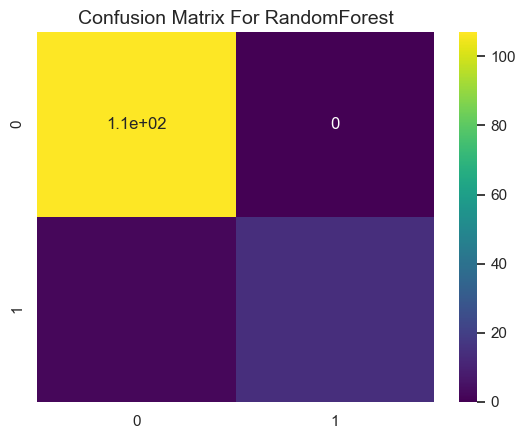

In [57]:
rf_y_pred = randomforest_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For RandomForest", fontsize=14)

In [ ]:
#Removing outliers is useful since accuracy of learning model improved from 95.9349593495935 to 98.3739837398374

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [60]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 96.72


In [61]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 96.7479674796748


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

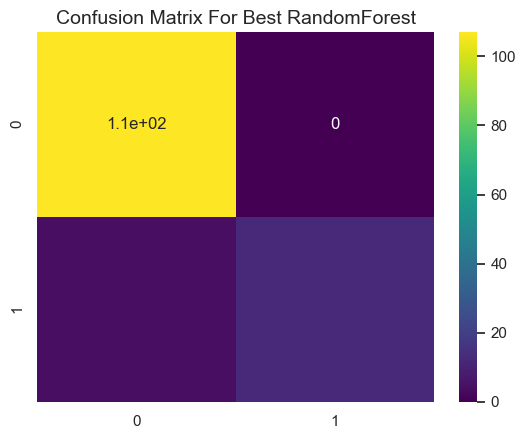

In [62]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

In [37]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import root_mean_squared_error

# #assigning numeric values to categorical data
# hcv['Category'] = hcv['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
#                                      "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

# hcv['Sex'] = hcv['Sex'].map({'m': 1, 'f': 0})

# Create a synthetic dataset
np.random.seed(42)

hcv = pd.DataFrame({
    'CHE': np.random.normal(0, 1, 100),
    'AST': np.random.normal(0, 1, 100),
    'BIL': np.random.normal(0, 1, 100),
})

# Introduce missing values
missing_percentages = [1, 5, 10]
for percentage in missing_percentages:
    mask = np.random.rand(*hcv.shape) < percentage / 100
    hcv[mask] = np.nan

# Function to evaluate imputation methods
def evaluate_imputation(original, imputed):
    # Filter out NaN values in the original data
    mask = ~np.isnan(original)
    original_no_nan = original[mask]
    imputed_no_nan = imputed[mask]

    # Calculate RMSE
    rmse = mean_squared_error(original_no_nan, imputed_no_nan, squared=False)

    # Calculate Bias
    bias = np.mean(imputed_no_nan - original_no_nan)

    # Calculate Variance
    variance = np.var(imputed_no_nan - original_no_nan)

    return rmse, bias, variance

# Imputation methods
def impute_data(hcv, method):
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
    
    # Fit the imputer on the original data
    imputer.fit(hcv)
    
    # Transform the data to impute missing values
    imputed_data = imputer.transform(hcv)
    return imputed_data

# Evaluate imputation for each missing percentage
for percentage in missing_percentages:
    # Create a copy of the original data
    original_data = hcv.copy()

    # Introduce missing values
    mask = np.random.rand(*hcv.shape) < percentage / 100
    hcv[mask] = np.nan

    # Impute missing values using different methods
    imputed_mean = impute_data(hcv, 'mean')
    imputed_median = impute_data(hcv, 'median')
    imputed_most_frequent = impute_data(hcv, 'most_frequent')

    # mse_mean, bias_mean, variance_mean, mse_median, bias_median, variance_median, mse_most_frequent, bias_most_frequent, variance_most_frequent = 0
    # Evaluate imputation methods
    mse_mean, bias_mean, variance_mean = evaluate_imputation(original_data.values, imputed_mean)
    mse_median, bias_median, variance_median = evaluate_imputation(original_data.values, imputed_median)
    mse_most_frequent, bias_most_frequent, variance_most_frequent = evaluate_imputation(original_data.values, imputed_most_frequent)

    # Print results
    print(f"\nMissing Percentage: {percentage}%")
    print("Mean Imputation:")
    print(f"   RMSE: {mse_mean:.4f}")
    print(f"   Bias: {bias_mean:.4f}")
    print(f"   Variance: {variance_mean:.4f}")

    print("\nMedian Imputation:")
    print(f"   RMSE: {mse_median:.4f}")
    print(f"   Bias: {bias_median:.4f}")
    print(f"   Variance: {variance_median:.4f}")

    print("\nmost_frequent Imputation:")
    print(f"   RMSE: {mse_most_frequent:.4f}")
    print(f"   Bias: {bias_most_frequent:.4f}")
    print(f"   Variance: {variance_most_frequent:.4f}")



Missing Percentage: 1%
Mean Imputation:
   RMSE: 0.0874
   Bias: 0.0056
   Variance: 0.0076

Median Imputation:
   RMSE: 0.0928
   Bias: 0.0060
   Variance: 0.0086

most_frequent Imputation:
   RMSE: 0.1304
   Bias: -0.0106
   Variance: 0.0169

Missing Percentage: 5%
Mean Imputation:
   RMSE: 0.2165
   Bias: 0.0176
   Variance: 0.0466

Median Imputation:
   RMSE: 0.2244
   Bias: 0.0199
   Variance: 0.0500

most_frequent Imputation:
   RMSE: 0.4018
   Bias: -0.0667
   Variance: 0.1570

Missing Percentage: 10%
Mean Imputation:
   RMSE: 0.3276
   Bias: 0.0296
   Variance: 0.1065

Median Imputation:
   RMSE: 0.3344
   Bias: 0.0374
   Variance: 0.1104

most_frequent Imputation:
   RMSE: 0.7317
   Bias: -0.2234
   Variance: 0.4855


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: '